In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Statistical Signficance

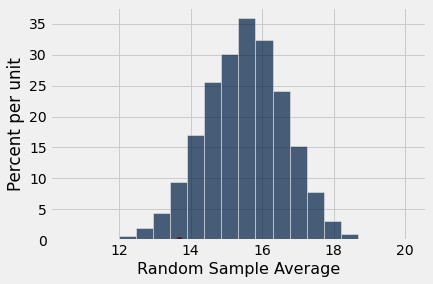

In [3]:
scores = Table.read_table('scores_by_section.csv')
scores

observed_average = 13.6667

# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [4]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [5]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

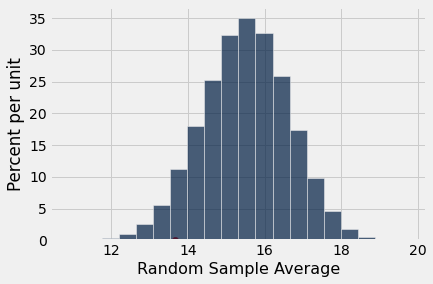

In [6]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [7]:
sum(sample_averages <= observed_average) / 50000

0.05656

In [8]:
# 5% of 50,000 = 2500

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.62962962962963

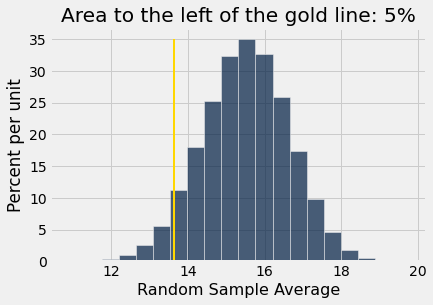

In [9]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');

# A/B Testing

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


Let's quickly look at the table and ask:
1. What does each row represent?
2. What do the columns represent?

**Question:** Was there an association between baby health and whether the mother was a smoker?

In [4]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


#### How many smokers and nonsmoker were there?
What table method can help us determine this?

<details>
<summary>Solution</summary>
  smoking_and_birthweight.group('Maternal Smoker')
</details>


In [12]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


### Distribution of birth weights for the groups
We want to look at the distribution of birth weight 
for these two groups. 

What visualization should we use?
<details>
<summary>Solution</summary>
  histogram!
</details>
<details>
<summary>Code</summary>
  smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')
</details>


/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


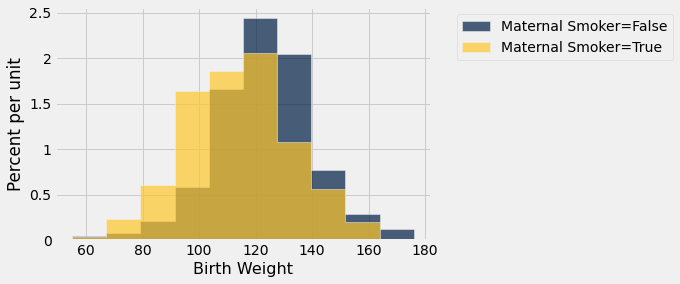

In [15]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

Do we see a difference between the two groups?

<details>
<summary>Solution</summary>
  Yes, the baby's whose mother's smoked were a little lighter on average
</details>

(back to slides)
## Test Statistic

In [16]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [17]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [18]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [22]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

(back to slides)
# Random Permutation (Shuffling)

In [23]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [24]:
letters

Letter
a
b
c
d
e


In [25]:
letters.sample()

Letter
b
a
d
b
e


In [30]:
letters.sample(with_replacement = False)

Letter
c
e
b
a
d


In [36]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,b
b,c
c,e
d,a
e,d


# Simulation Under Null Hypothesis

In [37]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


### Permute/Shuffle our data

In [38]:
smoking_and_birthweight.num_rows

1174

In [43]:
smoking_and_birthweight.sample()

Maternal Smoker,Birth Weight
False,84
True,117
False,114
False,163
True,113
True,103
False,137
False,133
False,124
False,132


In [59]:
shuffled_list = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')

In [60]:
Table().with_columns('shuffle', shuffled_list).group('shuffle')

shuffle,count
False,715
True,459


In [61]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


In [65]:
shuffled_table = smoking_and_birthweight.with_columns('shuffle', shuffled_list)

In [72]:
group_A_mean = np.mean(shuffled_table.where('shuffle', True).column('Birth Weight'))
group_B_mean = np.mean(shuffled_table.where('shuffle', False).column('Birth Weight'))
group_A_mean - group_B_mean

0.635687188628367

In [75]:
group_differences = make_array()
for i in np.arange(1e4):
    shuffled_list = smoking_and_birthweight.sample(with_replacement=False
                                                    ).column('Maternal Smoker')
    shuffled_table = smoking_and_birthweight.with_columns('shuffle', shuffled_list)
    group_A_mean = np.mean(shuffled_table.where('shuffle', True).column('Birth Weight'))
    group_B_mean = np.mean(shuffled_table.where('shuffle', False).column('Birth Weight'))
    current_group_difference = group_A_mean - group_B_mean
    group_differences = np.append(group_differences, current_group_difference)

Observed Difference: -9.266142572024918


Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

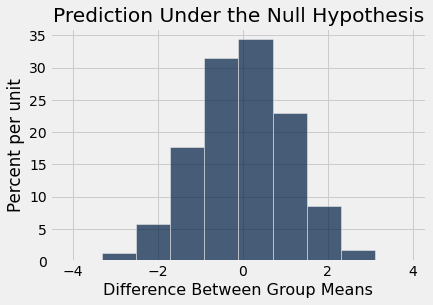

In [78]:
Table().with_column('Difference Between Group Means', group_differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis')

In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')

In [ ]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [ ]:
original_and_shuffled

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

## Permutation Test


In [76]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label') 

In [77]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

0.3960113960114029

In [ ]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_14_completed.ipynb", pdf=False)